# AdaptiveSplit Analysis

In [22]:
from __future__ import annotations
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

from random import sample
import warnings

In [23]:
# average scores/pvals through each permutation: 
# i.e. average data with different random seed, keep information for different sample sizes;
def mean_window(arr, n_samples, n_permutations):
    windows = np.array(arr).reshape(n_permutations, n_samples)
    avg = np.mean(windows, axis=0)
    return avg

def std_window(arr, n_samples, n_permutations):
    windows = np.array(arr).reshape(n_permutations, n_samples)
    std = np.std(windows, axis=0)
    return std

In [24]:
def get_training(dataset, n_samples, n_permutations):
    dataset = dataset    
    data = pd.read_csv(dataset + '/results.csv', delimiter=',', encoding='utf-8')

    n_samples = n_samples
    n_permutations = n_permutations

    # train scores;
    pareto_train_scores = mean_window(data['pareto_train_scores'], n_samples, n_permutations)
    pareto_train_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="pareto_train_scores").sem()

    halfsplit_train_scores = mean_window(data['halfsplit_train_scores'], n_samples, n_permutations)
    halfsplit_train_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="halfsplit_train_scores").sem()

    split9010_train_scores = mean_window(data['split90-10_train_scores'], n_samples, n_permutations)
    split9010_train_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="split90-10_train_scores").sem()

    adaptivesplit_train_scores = mean_window(data['adaptivesplit_train_scores'], n_samples, n_permutations)
    adaptivesplit_train_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="adaptivesplit_train_scores").sem()

    return pareto_train_scores, pareto_train_se, halfsplit_train_scores, halfsplit_train_se, split9010_train_scores, split9010_train_se, adaptivesplit_train_scores, adaptivesplit_train_se

def get_test(dataset, n_samples, n_permutations):
    dataset = dataset    
    data = pd.read_csv(dataset + '/results.csv', delimiter=',', encoding='utf-8')

    n_samples = n_samples
    n_permutations = n_permutations

    # test scores; 
    pareto_test_scores = mean_window(data['pareto_test_scores'], n_samples, n_permutations)
    pareto_test_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="pareto_test_scores").sem()

    halfsplit_test_scores = mean_window(data['halfsplit_test_scores'], n_samples, n_permutations)
    halfsplit_test_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="halfsplit_test_scores").sem()

    split9010_test_scores = mean_window(data['split90-10_test_scores'], n_samples, n_permutations)
    split9010_test_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="split90-10_test_scores").sem()

    adaptivesplit_test_scores = mean_window(data['adaptivesplit_test_scores'], n_samples, n_permutations)
    adaptivesplit_test_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="adaptivesplit_test_scores").sem()

    return pareto_test_scores, pareto_test_se, halfsplit_test_scores, halfsplit_test_se, split9010_test_scores, split9010_test_se, adaptivesplit_test_scores, adaptivesplit_test_se

def get_pvals(dataset, n_samples, n_permutations):
    dataset = dataset    
    data = pd.read_csv(dataset + '/results.csv', delimiter=',', encoding='utf-8')

    n_samples = n_samples
    n_permutations = n_permutations

    # p-values;
    pareto_p_values = mean_window(data['pareto_p_values'], n_samples, n_permutations)
    pareto_pval_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="pareto_p_values").sem()

    halfsplit_p_values = mean_window(data['halfsplit_p_values'], n_samples, n_permutations)
    halfsplit_pval_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="halfsplit_p_values").sem()

    split9010_p_values = mean_window(data['split90-10_p_values'], n_samples, n_permutations)
    split9010_pval_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="split90-10_p_values").sem()

    adaptivesplit_p_values = mean_window(data['adaptivesplit_p_values'], n_samples, n_permutations)
    adaptivesplit_pval_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="adaptivesplit_p_values").sem()

    return pareto_p_values, pareto_pval_se, halfsplit_p_values, halfsplit_pval_se, split9010_p_values, split9010_pval_se, adaptivesplit_p_values, adaptivesplit_pval_se

def plot_analyses(dataset, n_samples, n_permutations, scoring_label=""):

    dataset = dataset    
    data = pd.read_csv(dataset + '/results.csv', delimiter=',', encoding='utf-8')

    n_samples = n_samples
    n_permutations = n_permutations
    
    sample_sizes = data['truncate_sample_size'].unique().astype(int) # data['truncate_sample_size'][0:n_samples]
    total_sample_size = np.max(sample_sizes)
    adaptivesplit_sample_size = mean_window(data['adaptivesplit_sample_size'], 5, 100)

    plt.figure(figsize=(60, 12))
    mpl.rcParams['lines.linewidth'] = 8
    set_labels_size = 35

    # plot train scores;
    plt.subplot(1, 3, 1)
    plt.plot(sample_sizes, pareto_train_scores, 'r')
    plt.fill_between(sample_sizes, pareto_train_scores-(pareto_train_se/2), pareto_train_scores+(pareto_train_se/2), edgecolor='r', facecolor='r', alpha=0.1)

    plt.plot(sample_sizes, halfsplit_train_scores, 'y')
    plt.fill_between(sample_sizes, halfsplit_train_scores-(halfsplit_train_se/2), halfsplit_train_scores+(halfsplit_train_se/2), edgecolor='y', facecolor='y', alpha=0.1)

    plt.plot(sample_sizes, split9010_train_scores, 'g')
    plt.fill_between(sample_sizes, split9010_train_scores-(split9010_train_se/2), split9010_train_scores+(split9010_train_se/2), edgecolor='g', facecolor='g', alpha=0.1)

    plt.plot(sample_sizes, adaptivesplit_train_scores, 'b-o', markersize=22)
    plt.fill_between(sample_sizes, adaptivesplit_train_scores-(adaptivesplit_train_se/2), adaptivesplit_train_scores+(adaptivesplit_train_se/2), edgecolor='b', facecolor='b', alpha=0.1)

    plt.title('Discovery Scores', fontsize=40, fontweight='bold')
    plt.ylabel(scoring_label, fontsize=40, fontweight='bold')
    plt.xlabel("sample size", fontsize=40, fontweight='bold')
    plt.xticks(fontsize = set_labels_size)
    plt.yticks(fontsize = set_labels_size)
    plt.grid(True, color = "grey", linewidth = "2.5", linestyle = "--", alpha=0.4, axis='y')

    # label points on the plot
    for index, x, y in zip(range(len(sample_sizes)), sample_sizes, adaptivesplit_train_scores):
        plt.text(x = x, y = y, s = '{}-{}'.format(int((adaptivesplit_sample_size[index]/total_sample_size)*100),
                                    100 - int((adaptivesplit_sample_size[index]/total_sample_size)*100)), color = 'white', fontsize=22, weight='bold').set_backgroundcolor('#0000FF')

    # plot test scores;
    plt.subplot(1, 3, 2)
    plt.plot(sample_sizes, pareto_test_scores, 'r')
    plt.fill_between(sample_sizes, pareto_test_scores-(pareto_test_se/2), pareto_test_scores+(pareto_test_se/2), edgecolor='r', facecolor='r', alpha=0.1)

    plt.plot(sample_sizes, halfsplit_test_scores, 'y')
    plt.fill_between(sample_sizes, halfsplit_test_scores-(halfsplit_test_se/2), halfsplit_test_scores+(halfsplit_test_se/2), edgecolor='y', facecolor='y', alpha=0.1)

    plt.plot(sample_sizes, split9010_test_scores, 'g')
    plt.fill_between(sample_sizes, split9010_test_scores-(split9010_test_se/2), split9010_test_scores+(split9010_test_se/2), edgecolor='g', facecolor='g', alpha=0.1)

    plt.plot(sample_sizes, adaptivesplit_test_scores, 'b-o', markersize=0)
    plt.fill_between(sample_sizes, adaptivesplit_test_scores-(adaptivesplit_test_se/2), adaptivesplit_test_scores+(adaptivesplit_test_se/2), edgecolor='b', facecolor='b', alpha=0.1)

    plt.title('External Validation Scores', fontsize=40, fontweight='bold')
    plt.ylabel(scoring_label, fontsize=40, fontweight='bold')
    plt.xlabel("sample size", fontsize=40, fontweight='bold')
    plt.xticks(fontsize = set_labels_size)
    plt.yticks(fontsize = set_labels_size)
    plt.grid(True, color = "grey", linewidth = "2.5", linestyle = "--", alpha=0.4, axis='y')

    # label points on the plot
    for index, x, y in zip(range(len(sample_sizes)), sample_sizes, adaptivesplit_test_scores):
        plt.text(x = x, y = y, s = '{}-{}'.format(int((adaptivesplit_sample_size[index]/total_sample_size)*100),
                                    100 - int((adaptivesplit_sample_size[index]/total_sample_size)*100)), color = 'white', fontsize=22, weight='bold').set_backgroundcolor('#0000FF')

    # plot p-values;
    plt.subplot(1, 3, 3)
    plt.plot(sample_sizes, pareto_p_values, 'r')
    plt.fill_between(sample_sizes, pareto_p_values-(pareto_pval_se/2), pareto_p_values+(pareto_pval_se/2), edgecolor='r', facecolor='r', alpha=0.1)

    plt.plot(sample_sizes, halfsplit_p_values, 'y')
    plt.fill_between(sample_sizes, halfsplit_p_values-(halfsplit_pval_se/2), halfsplit_p_values+(halfsplit_pval_se/2), edgecolor='y', facecolor='y', alpha=0.1)

    plt.plot(sample_sizes, split9010_p_values, 'g')
    plt.fill_between(sample_sizes, split9010_p_values-(split9010_pval_se/2), split9010_p_values+(split9010_pval_se/2), edgecolor='g', facecolor='g', alpha=0.1)

    plt.plot(sample_sizes, adaptivesplit_p_values, 'b-o', markersize=0)
    plt.fill_between(sample_sizes, adaptivesplit_p_values-(adaptivesplit_pval_se/2), adaptivesplit_p_values+(adaptivesplit_pval_se/2), edgecolor='b', facecolor='b', alpha=0.1)

    # label points on the plot
    for index, x, y in zip(range(len(sample_sizes)), sample_sizes, adaptivesplit_p_values):
        plt.text(x = x, y = y, s = '{}-{}'.format(int((adaptivesplit_sample_size[index]/total_sample_size)*100),
                                    100 - int((adaptivesplit_sample_size[index]/total_sample_size)*100)), color = 'white', fontsize=22, weight='bold').set_backgroundcolor('#0000FF')

    plt.title('Statistical significance', fontsize=40, fontweight='bold')
    plt.ylabel('P-values', fontsize=40, fontweight='bold')
    plt.xlabel("sample size", fontsize=40, fontweight='bold')
    plt.xticks(fontsize = set_labels_size)
    plt.yticks(fontsize = set_labels_size)
    plt.grid(True, color = "grey", linewidth = "2.5", linestyle = "--", alpha=0.4, axis='y')
    plt.show()


## BCW dataset, results (train and test scores, p-values)

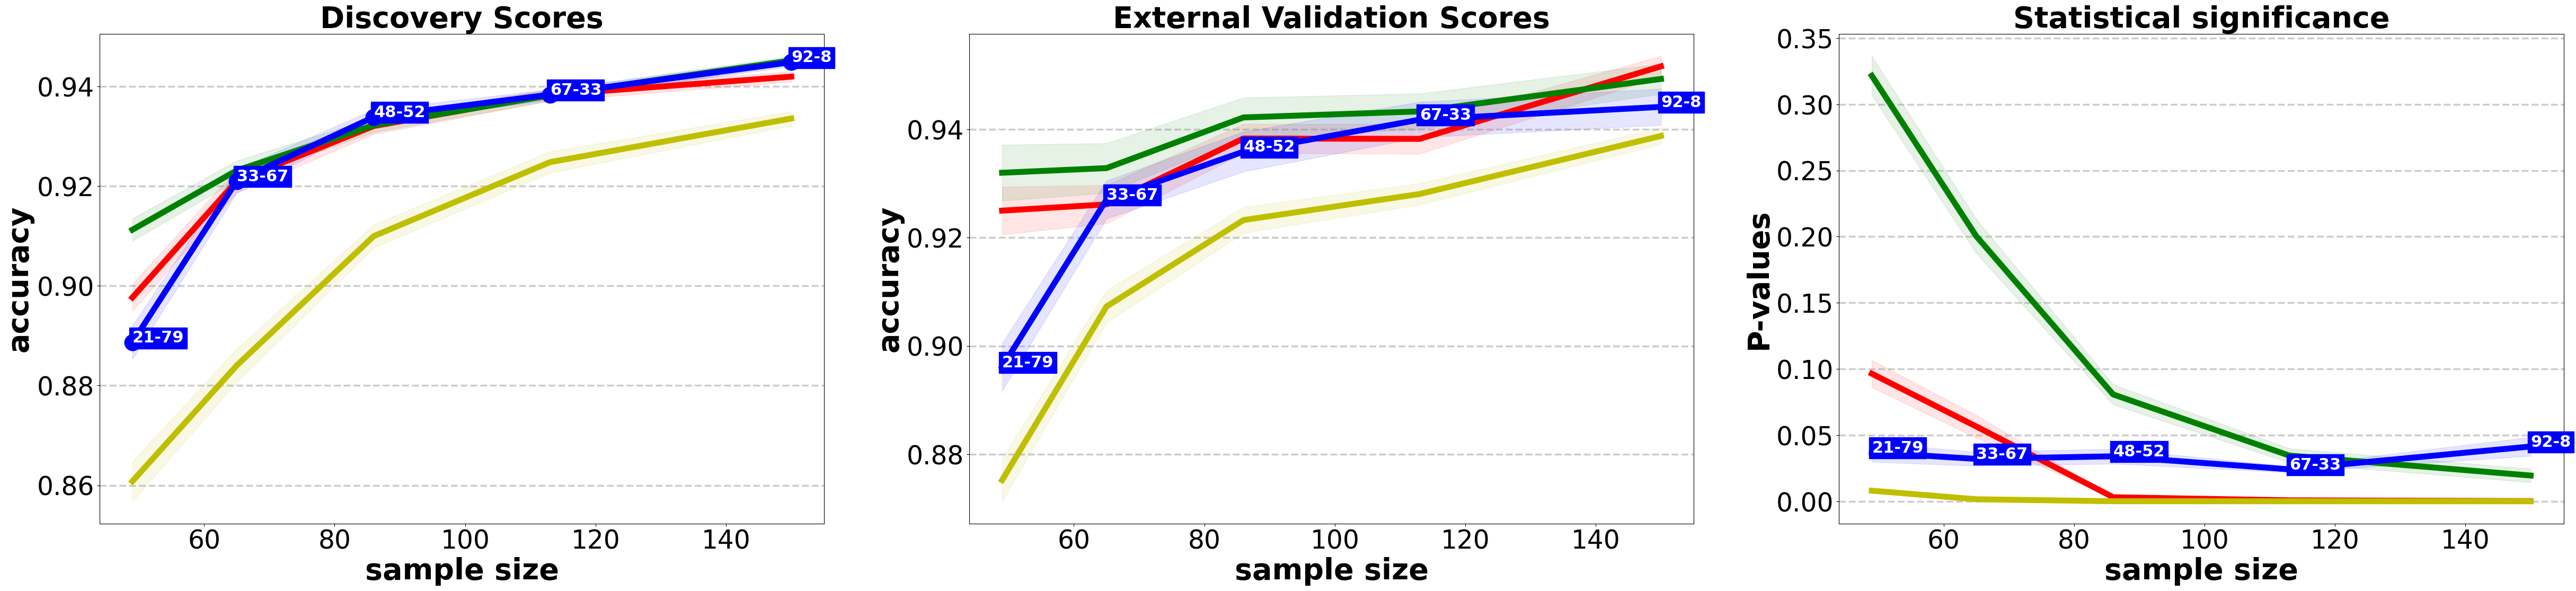

<Figure size 640x480 with 0 Axes>

In [25]:
dataset = '../data_out/BCW'

# Get data;
pareto_train_scores, pareto_train_se, \
halfsplit_train_scores, halfsplit_train_se, \
split9010_train_scores, split9010_train_se, \
adaptivesplit_train_scores, adaptivesplit_train_se = get_training(dataset, 5, 100)

pareto_test_scores, pareto_test_se, \
halfsplit_test_scores, halfsplit_test_se, \
split9010_test_scores, split9010_test_se, \
adaptivesplit_test_scores, adaptivesplit_test_se = get_test(dataset, 5, 100)

pareto_p_values, pareto_pval_se, \
halfsplit_p_values, halfsplit_pval_se, \
split9010_p_values, split9010_pval_se, \
adaptivesplit_p_values, adaptivesplit_pval_se = get_pvals(dataset, 5, 100)

# Plot data;
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    plot_analyses(dataset, 5, 100, scoring_label="accuracy")

plt.tight_layout()
plt.show()


## Abide dataset, results (train and test scores, p-values)

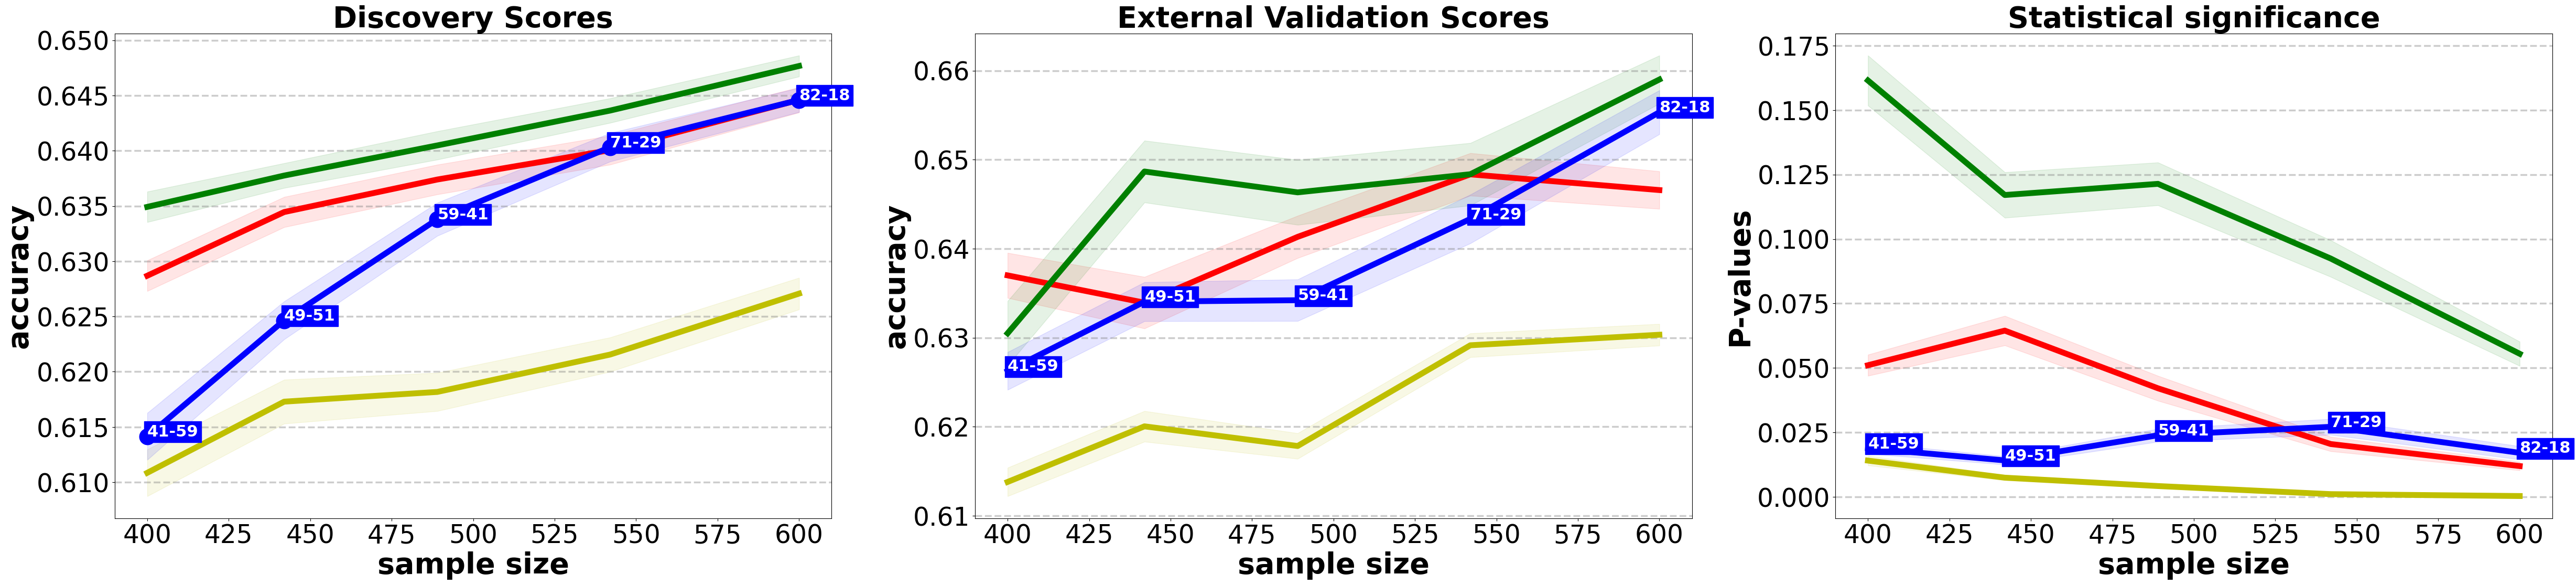

<Figure size 640x480 with 0 Axes>

In [26]:
dataset = '../data_out/ABIDE'

# Get data;
pareto_train_scores, pareto_train_se, \
halfsplit_train_scores, halfsplit_train_se, \
split9010_train_scores, split9010_train_se, \
adaptivesplit_train_scores, adaptivesplit_train_se = get_training(dataset, 5, 100)

pareto_test_scores, pareto_test_se, \
halfsplit_test_scores, halfsplit_test_se, \
split9010_test_scores, split9010_test_se, \
adaptivesplit_test_scores, adaptivesplit_test_se = get_test(dataset, 5, 100)

pareto_p_values, pareto_pval_se, \
halfsplit_p_values, halfsplit_pval_se, \
split9010_p_values, split9010_pval_se, \
adaptivesplit_p_values, adaptivesplit_pval_se = get_pvals(dataset, 5, 100)

# Plot data;
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    plot_analyses(dataset, 5, 100, scoring_label="accuracy")

plt.tight_layout()
plt.show()

## HCP dataset, results (train and test scores, p-values)

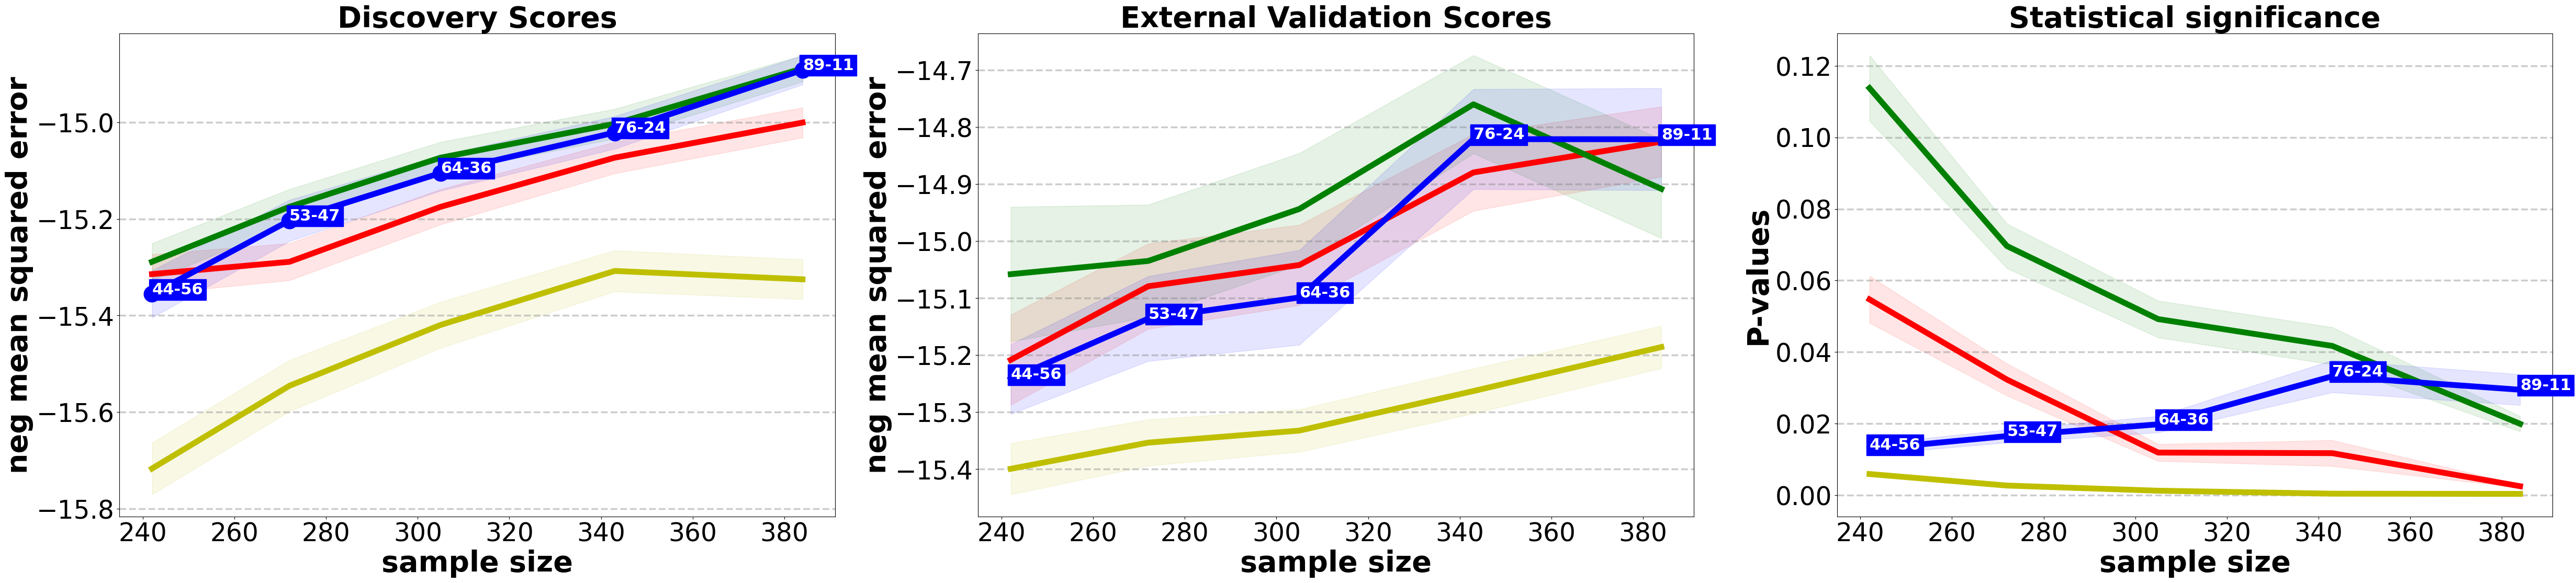

<Figure size 640x480 with 0 Axes>

In [27]:
dataset = '../data_out/HCP'

# Get data;
pareto_train_scores, pareto_train_se, \
halfsplit_train_scores, halfsplit_train_se, \
split9010_train_scores, split9010_train_se, \
adaptivesplit_train_scores, adaptivesplit_train_se = get_training(dataset, 5, 100)

pareto_test_scores, pareto_test_se, \
halfsplit_test_scores, halfsplit_test_se, \
split9010_test_scores, split9010_test_se, \
adaptivesplit_test_scores, adaptivesplit_test_se = get_test(dataset, 5, 100)

pareto_p_values, pareto_pval_se, \
halfsplit_p_values, halfsplit_pval_se, \
split9010_p_values, split9010_pval_se, \
adaptivesplit_p_values, adaptivesplit_pval_se = get_pvals(dataset, 5, 100)

# Plot data;
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    plot_analyses(dataset, 5, 100, scoring_label="neg mean squared error")

plt.tight_layout()
plt.show()

## IXI dataset, results (train and test scores, p-values)

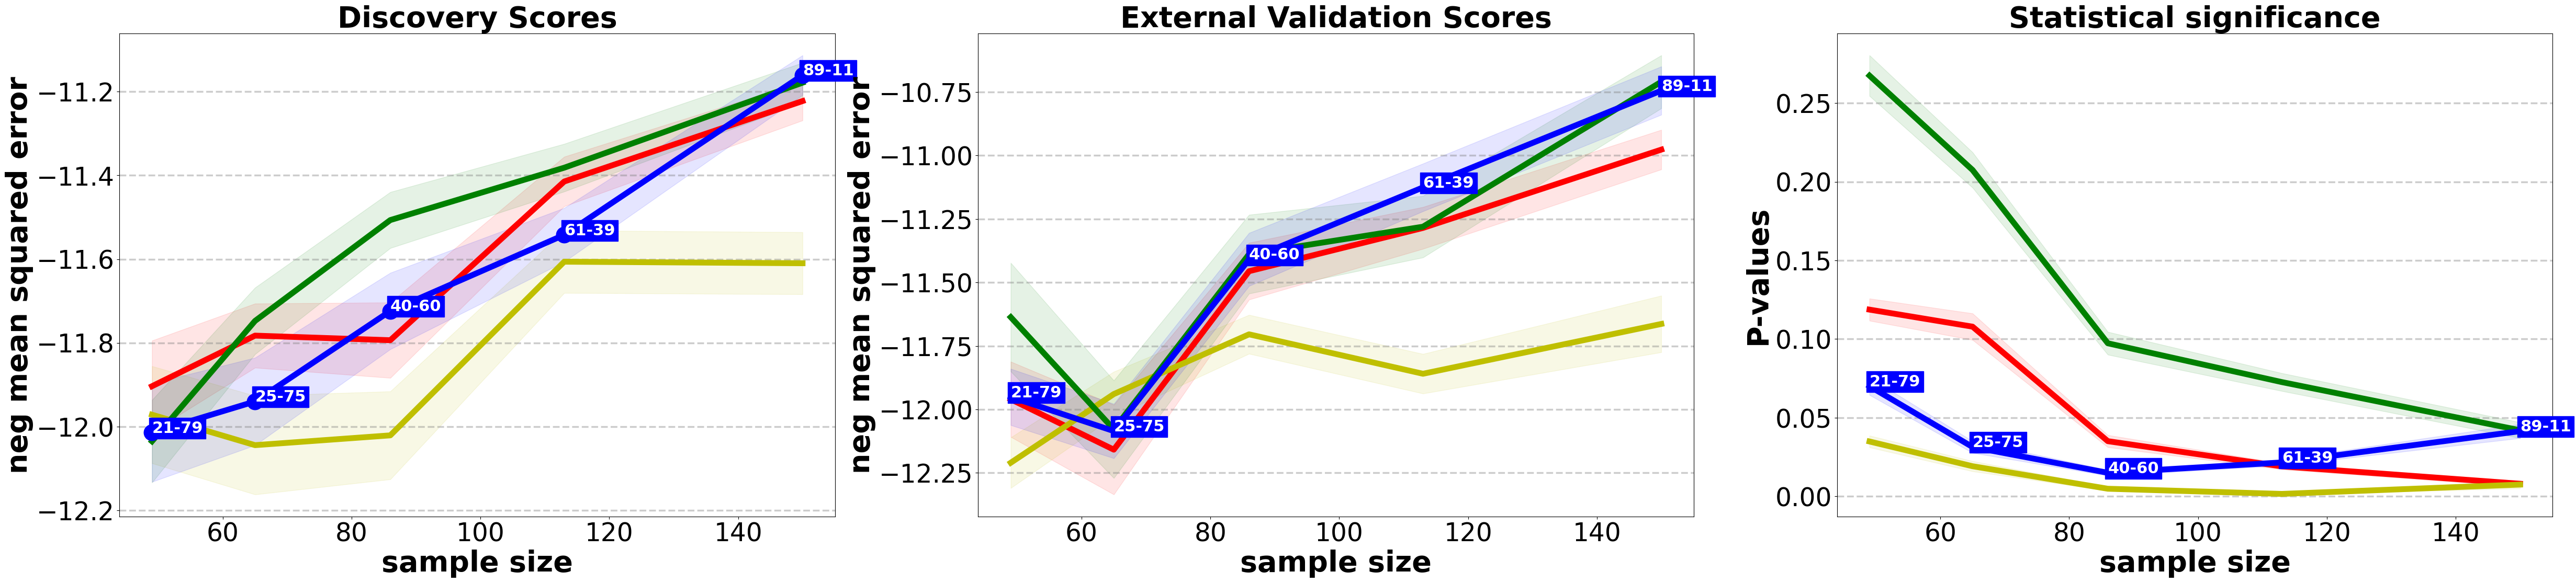

<Figure size 640x480 with 0 Axes>

In [28]:
dataset = '../data_out/IXI'

# Get data;
pareto_train_scores, pareto_train_se, \
halfsplit_train_scores, halfsplit_train_se, \
split9010_train_scores, split9010_train_se, \
adaptivesplit_train_scores, adaptivesplit_train_se = get_training(dataset, 5, 100)

pareto_test_scores, pareto_test_se, \
halfsplit_test_scores, halfsplit_test_se, \
split9010_test_scores, split9010_test_se, \
adaptivesplit_test_scores, adaptivesplit_test_se = get_test(dataset, 5, 100)

pareto_p_values, pareto_pval_se, \
halfsplit_p_values, halfsplit_pval_se, \
split9010_p_values, split9010_pval_se, \
adaptivesplit_p_values, adaptivesplit_pval_se = get_pvals(dataset, 5, 100)

# Plot data;
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    plot_analyses(dataset, 5, 100, scoring_label="neg mean squared error")

plt.tight_layout()
plt.show()


### Plots for BCW's learning curve with AdaptiveSplit performance mode, on the whole dataset's sample size

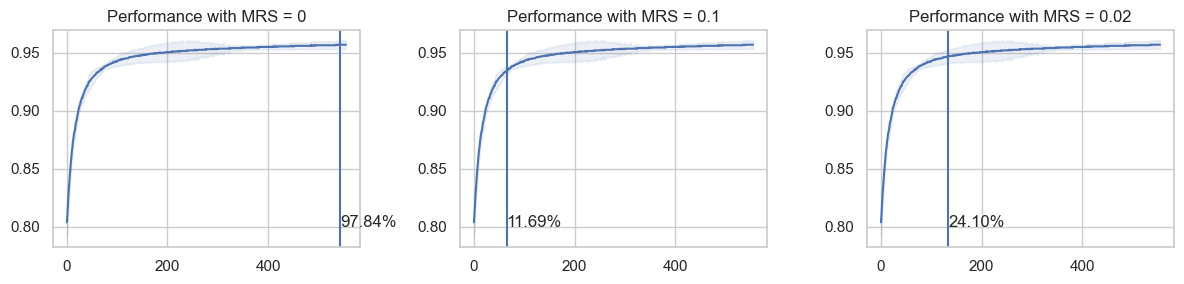

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import ast

# Function to load and process data;
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        learning_curves = data["adaptivesplit_learning_curve"]
        sample_sizes = data["adaptivesplit_sample_size"]
        truncate_sizes = data["truncate_sample_size"]
        
        # Parse the learning curves;
        learning_curves = [np.array(ast.literal_eval(curve), dtype=np.float16) for curve in learning_curves]
        return np.array(learning_curves), np.array(sample_sizes), np.array(truncate_sizes).mean()
    except (FileNotFoundError, KeyError, ValueError) as e:
        print(f"Error loading data from {file_path}: {e}")
        return None, None, None

# File paths and min_relevant_scores;
file_paths = ["../data_out/BCW_pmode/results_0.csv", 
              "../data_out/BCW_pmode/results_0.1.csv", 
              "../data_out/BCW_pmode/results_0.02.csv"]

min_relevant_scores = [0, 0.1, 0.02]

# Load all datasets;
datasets = [load_data(path) for path in file_paths]

# Initialize warnings filter;
warnings.filterwarnings("ignore")

# Prepare the plot;
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

# Plot learning curves for each dataset;
for i, (data, mrs) in enumerate(zip(datasets, min_relevant_scores)):
    lc, stops, truncate_size = data
    if lc is None:
        continue

    ####
    # Using std here instead of SEM because SEM is really small and not visible in the plot;
    ####

    # Calculate mean and standard deviation of learning curves;
    lc_mean = lc.mean(axis=0)
    lc_std = np.std(lc, axis=0)
    stops_mean = stops.mean()

    # Adjust the stopping point based on the total sample size;
    stop_adj = int(len(lc_mean) * stops_mean / truncate_size)
    
    # Generate the x-axis values for the learning curve;
    x_values = np.arange(len(lc_mean))
    
    # Ensure that both the learning curve and the fill_between line are plotted over the same range;
    valid_indices = np.isfinite(lc_mean)
    x_values = x_values[valid_indices]
    lc_mean = lc_mean[valid_indices]
    lc_std = lc_std[valid_indices]

    # Plot the mean learning curve with standard deviation shading;
    ax[i].plot(x_values, lc_mean, c='b', linewidth=1.5)
    ax[i].fill_between(x_values, lc_mean - lc_std, lc_mean + lc_std, edgecolor='b', facecolor='b', alpha=0.1)
    ax[i].axvline(x=stop_adj, c='b')
    
    # Dynamically position the text label for the stop point;
    text_x = min(stop_adj, len(lc_mean) - 1)
    ax[i].text(text_x, 0.8, f"{(stop_adj / len(lc_mean)) * 100:.2f}%", rotation=0)
    
    # Set the subplot title
    ax[i].set_title(f'Performance with MRS = {mrs}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### Plot performance for additional splits and compare it to adaptivesplit's performance (75-25, 70-30 Splits)

In [17]:
def get_other_splits_training(dataset, n_samples, n_permutations):
    dataset = dataset    
    data = pd.read_csv(dataset + '/results.csv', delimiter=',', encoding='utf-8')

    n_samples = n_samples
    n_permutations = n_permutations

    # train scores;
    split7525_train_scores = mean_window(data['pareto_train_scores'], n_samples, n_permutations)
    split7525_train_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="pareto_train_scores").sem()

    split7030_train_scores = mean_window(data['halfsplit_train_scores'], n_samples, n_permutations)
    split7030_train_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="halfsplit_train_scores").sem()

    adaptivesplit_train_scores = mean_window(data['adaptivesplit_train_scores'], n_samples, n_permutations)
    adaptivesplit_train_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="adaptivesplit_train_scores").sem()

    return split7525_train_scores, split7525_train_se, split7030_train_scores, split7030_train_se, adaptivesplit_train_scores, adaptivesplit_train_se

def get_other_splits_test(dataset, n_samples, n_permutations):
    dataset = dataset    
    data = pd.read_csv(dataset + '/results.csv', delimiter=',', encoding='utf-8')

    n_samples = n_samples
    n_permutations = n_permutations

    # test scores; 
    split7525_test_scores = mean_window(data['pareto_test_scores'], n_samples, n_permutations)
    split7525_test_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="pareto_test_scores").sem()

    split7030_test_scores = mean_window(data['halfsplit_test_scores'], n_samples, n_permutations)
    split7030_test_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="halfsplit_test_scores").sem()

    adaptivesplit_test_scores = mean_window(data['adaptivesplit_test_scores'], n_samples, n_permutations)
    adaptivesplit_test_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="adaptivesplit_test_scores").sem()

    return split7525_test_scores, split7525_test_se, split7030_test_scores, split7030_test_se, adaptivesplit_test_scores, adaptivesplit_test_se

def get_other_splits_pvals(dataset, n_samples, n_permutations):
    dataset = dataset    
    data = pd.read_csv(dataset + '/results.csv', delimiter=',', encoding='utf-8')

    n_samples = n_samples
    n_permutations = n_permutations

    # p-values;
    split7525_p_values = mean_window(data['pareto_p_values'], n_samples, n_permutations)
    split7525_pval_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="pareto_p_values").sem()

    split7030_p_values = mean_window(data['halfsplit_p_values'], n_samples, n_permutations)
    split7030_pval_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="halfsplit_p_values").sem()

    adaptivesplit_p_values = mean_window(data['adaptivesplit_p_values'], n_samples, n_permutations)
    adaptivesplit_pval_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="adaptivesplit_p_values").sem()

    return split7525_p_values, split7525_pval_se, split7030_p_values, split7030_pval_se, adaptivesplit_p_values, adaptivesplit_pval_se

def plot_other_splits(dataset, n_samples, n_permutations, scoring_label=""):

    dataset = dataset    
    data = pd.read_csv(dataset + '/results.csv', delimiter=',', encoding='utf-8')

    n_samples = n_samples
    n_permutations = n_permutations
    
    sample_sizes = data['truncate_sample_size'].unique().astype(int) # data['truncate_sample_size'][0:n_samples]
    total_sample_size = np.max(sample_sizes)
    adaptivesplit_sample_size = mean_window(data['adaptivesplit_sample_size'], 5, 100)

    plt.figure(figsize=(60, 12))
    mpl.rcParams['lines.linewidth'] = 8
    set_labels_size = 35

    # plot train scores;
    plt.subplot(1, 3, 1)
    plt.plot(sample_sizes, split7525_train_scores, 'r')
    plt.fill_between(sample_sizes, split7525_train_scores-(split7525_train_se/2), split7525_train_scores+(split7525_train_se/2), edgecolor='r', facecolor='r', alpha=0.1)

    plt.plot(sample_sizes, split7030_train_scores, 'y')
    plt.fill_between(sample_sizes, split7030_train_scores-(split7030_train_se/2), split7030_train_scores+(split7030_train_se/2), edgecolor='y', facecolor='y', alpha=0.1)

    plt.plot(sample_sizes, adaptivesplit_train_scores, 'b-o', markersize=22)
    plt.fill_between(sample_sizes, adaptivesplit_train_scores-(adaptivesplit_train_se/2), adaptivesplit_train_scores+(adaptivesplit_train_se/2), edgecolor='b', facecolor='b', alpha=0.1)

    plt.title('Discovery Scores', fontsize=40, fontweight='bold')
    plt.ylabel(scoring_label, fontsize=40, fontweight='bold')
    plt.xlabel("sample size", fontsize=40, fontweight='bold')
    plt.xticks(fontsize = set_labels_size)
    plt.yticks(fontsize = set_labels_size)
    plt.grid(True, color = "grey", linewidth = "2.5", linestyle = "--", alpha=0.4, axis='y')
    plt.legend(["75-25%", "_", "70-30%", "_", "Adaptive Split", "_"], fontsize=30)

    # label points on the plot
    for index, x, y in zip(range(len(sample_sizes)), sample_sizes, adaptivesplit_train_scores):
        plt.text(x = x, y = y, s = '{}-{}'.format(int((adaptivesplit_sample_size[index]/total_sample_size)*100),
                                    100 - int((adaptivesplit_sample_size[index]/total_sample_size)*100)), color = 'white', fontsize=22, weight='bold').set_backgroundcolor('#0000FF')

    # plot test scores;
    plt.subplot(1, 3, 2)
    plt.plot(sample_sizes, split7525_test_scores, 'r')
    plt.fill_between(sample_sizes, split7525_test_scores-(split7525_test_se/2), split7525_test_scores+(split7525_test_se/2), edgecolor='r', facecolor='r', alpha=0.1)

    plt.plot(sample_sizes, split7030_test_scores, 'y')
    plt.fill_between(sample_sizes, split7030_test_scores-(split7030_test_se/2), split7030_test_scores+(split7030_test_se/2), edgecolor='y', facecolor='y', alpha=0.1)

    plt.plot(sample_sizes, adaptivesplit_test_scores, 'b-o', markersize=0)
    plt.fill_between(sample_sizes, adaptivesplit_test_scores-(adaptivesplit_test_se/2), adaptivesplit_test_scores+(adaptivesplit_test_se/2), edgecolor='b', facecolor='b', alpha=0.1)

    plt.title('External Validation Scores', fontsize=40, fontweight='bold')
    plt.ylabel(scoring_label, fontsize=40, fontweight='bold')
    plt.xlabel("sample size", fontsize=40, fontweight='bold')
    plt.xticks(fontsize = set_labels_size)
    plt.yticks(fontsize = set_labels_size)
    plt.grid(True, color = "grey", linewidth = "2.5", linestyle = "--", alpha=0.4, axis='y')
    plt.legend(["75-25%", "_", "70-30%", "_", "Adaptive Split", "_"], fontsize=30)

    # label points on the plot
    for index, x, y in zip(range(len(sample_sizes)), sample_sizes, adaptivesplit_test_scores):
        plt.text(x = x, y = y, s = '{}-{}'.format(int((adaptivesplit_sample_size[index]/total_sample_size)*100),
                                    100 - int((adaptivesplit_sample_size[index]/total_sample_size)*100)), color = 'white', fontsize=22, weight='bold').set_backgroundcolor('#0000FF')

    # plot p-values;
    plt.subplot(1, 3, 3)
    plt.plot(sample_sizes, split7525_p_values, 'r')
    plt.fill_between(sample_sizes, split7525_p_values-(split7525_pval_se/2), split7525_p_values+(split7525_pval_se/2), edgecolor='r', facecolor='r', alpha=0.1)

    plt.plot(sample_sizes, split7030_p_values, 'y')
    plt.fill_between(sample_sizes, split7030_p_values-(split7030_pval_se/2), split7030_p_values+(split7030_pval_se/2), edgecolor='y', facecolor='y', alpha=0.1)

    plt.plot(sample_sizes, adaptivesplit_p_values, 'b-o', markersize=0)
    plt.fill_between(sample_sizes, adaptivesplit_p_values-(adaptivesplit_pval_se/2), adaptivesplit_p_values+(adaptivesplit_pval_se/2), edgecolor='b', facecolor='b', alpha=0.1)

    # label points on the plot
    for index, x, y in zip(range(len(sample_sizes)), sample_sizes, adaptivesplit_p_values):
        plt.text(x = x, y = y, s = '{}-{}'.format(int((adaptivesplit_sample_size[index]/total_sample_size)*100),
                                    100 - int((adaptivesplit_sample_size[index]/total_sample_size)*100)), color = 'white', fontsize=22, weight='bold').set_backgroundcolor('#0000FF')

    plt.title('Statistical significance', fontsize=40, fontweight='bold')
    plt.ylabel('P-values', fontsize=40, fontweight='bold')
    plt.xlabel("sample size", fontsize=40, fontweight='bold')
    plt.xticks(fontsize = set_labels_size)
    plt.yticks(fontsize = set_labels_size)
    plt.grid(True, color = "grey", linewidth = "2.5", linestyle = "--", alpha=0.4, axis='y')
    plt.legend(["75-25%", "_", "70-30%", "_", "Adaptive Split", "_"], fontsize=30)
    plt.show()


### Other Splits, BCW

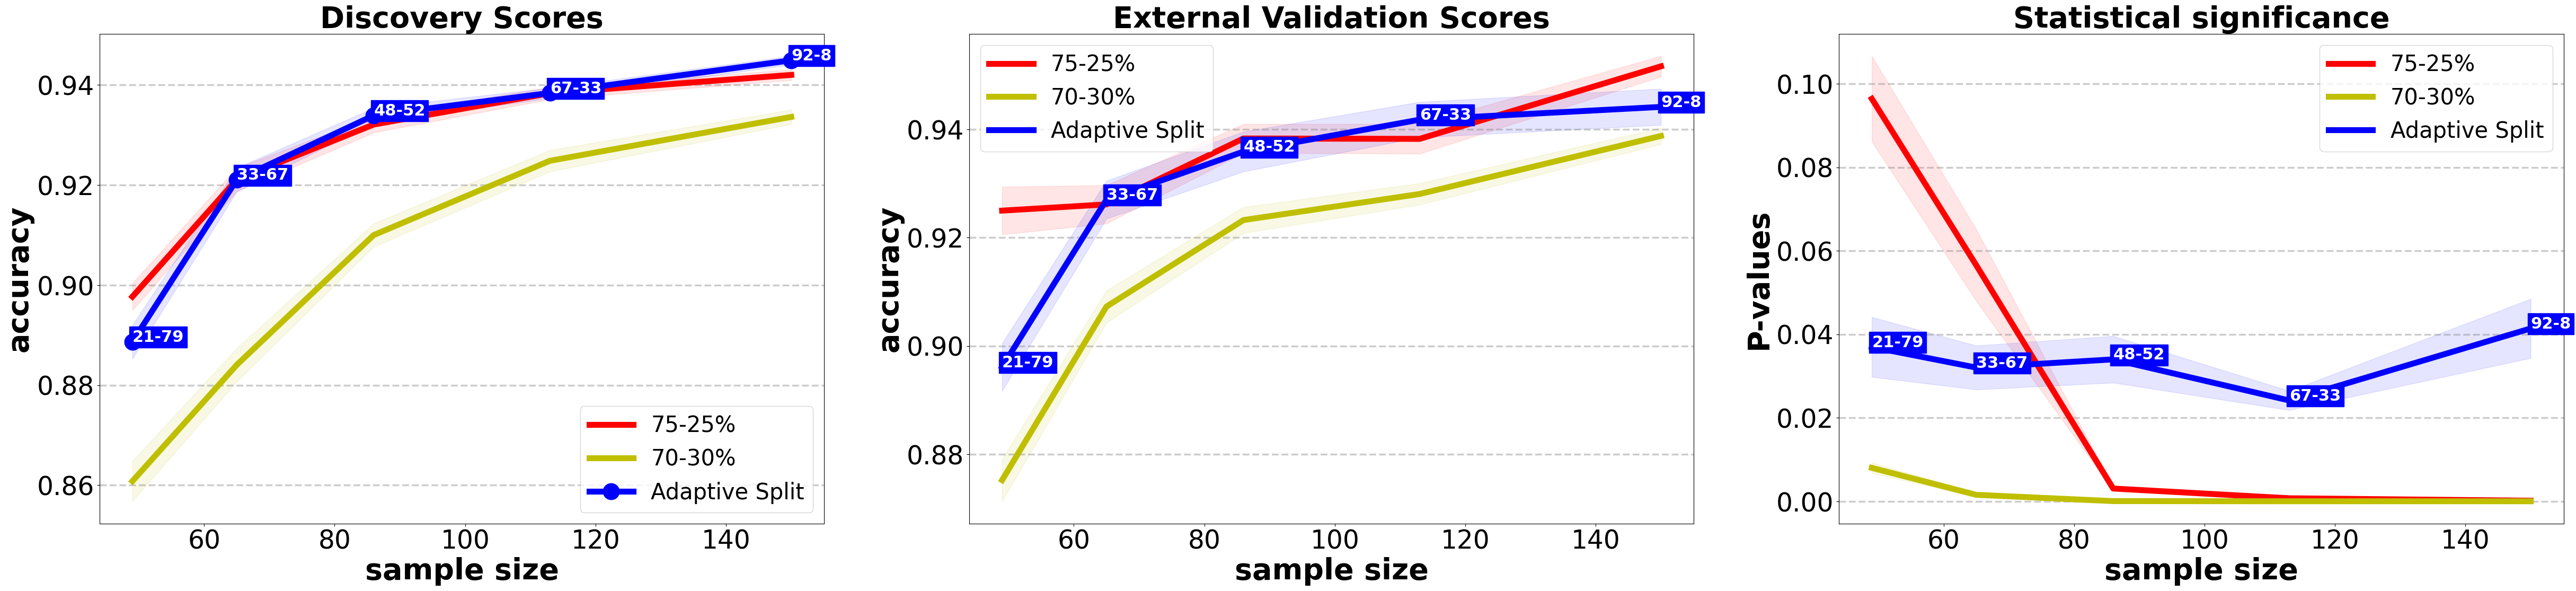

<Figure size 640x480 with 0 Axes>

In [18]:
dataset = '../data_out/BCW'

# Get data;
split7525_train_scores, split7525_train_se, \
split7030_train_scores, split7030_train_se, \
adaptivesplit_train_scores, adaptivesplit_train_se = get_other_splits_training(dataset, 5, 100)

split7525_test_scores, split7525_test_se, \
split7030_test_scores, split7030_test_se, \
adaptivesplit_test_scores, adaptivesplit_test_se = get_other_splits_test(dataset, 5, 100)

split7525_p_values, split7525_pval_se, \
split7030_p_values, split7030_pval_se, \
adaptivesplit_p_values, adaptivesplit_pval_se = get_other_splits_pvals(dataset, 5, 100)

# Plot data;
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    plot_other_splits(dataset, 5, 100, scoring_label="accuracy")
    
plt.tight_layout()
plt.show()


### Other Splits, ABIDE

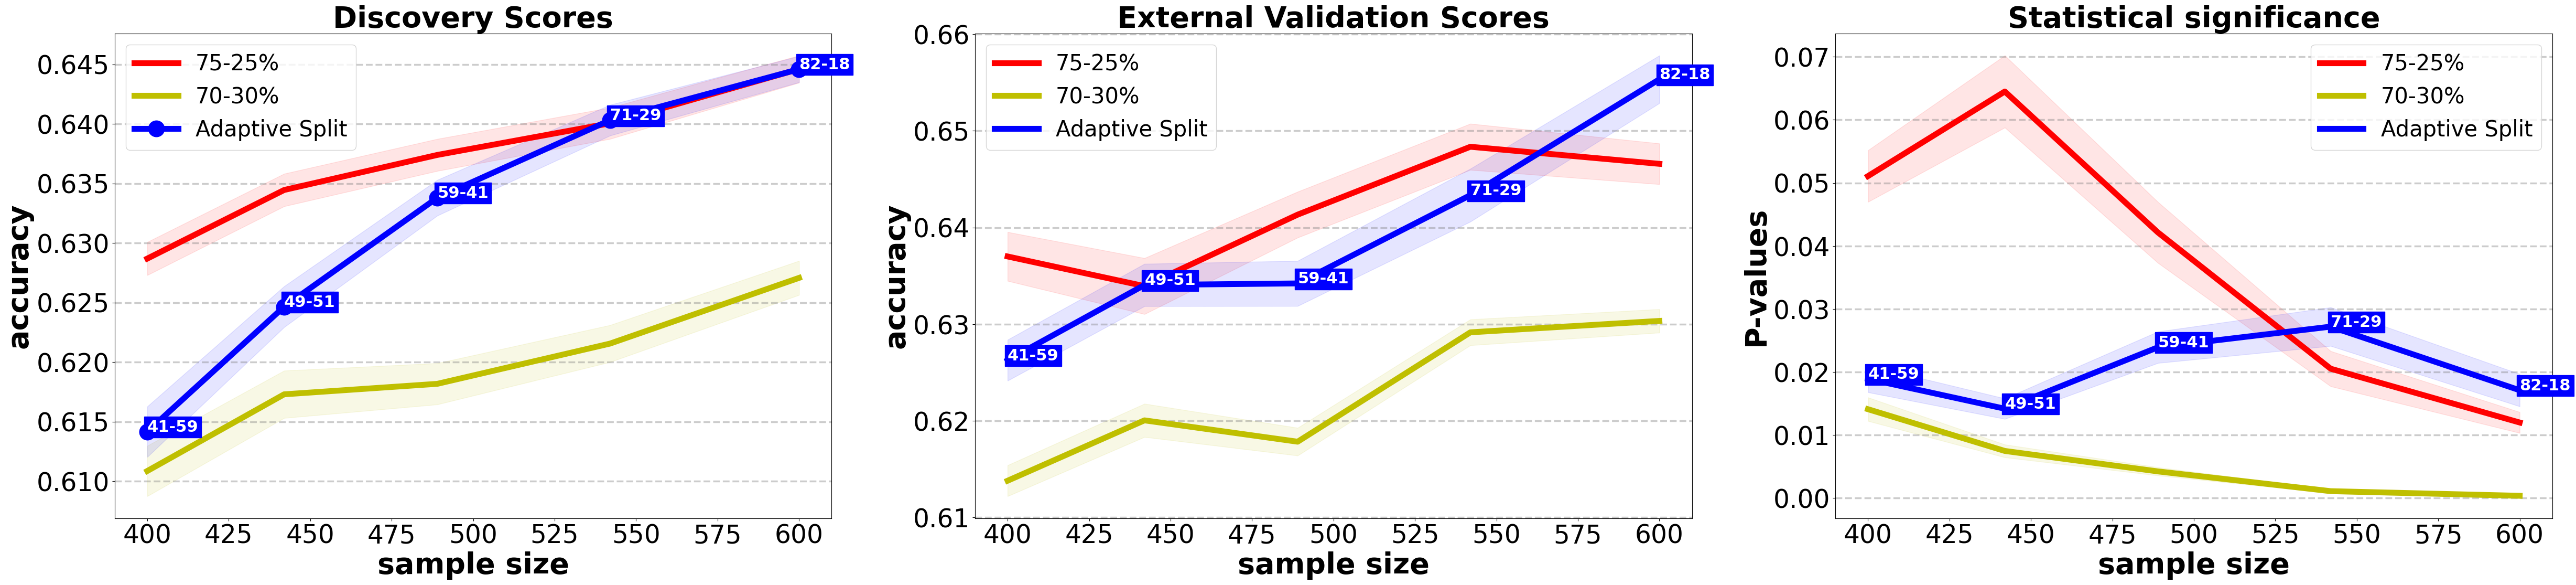

<Figure size 640x480 with 0 Axes>

In [19]:
dataset = '../data_out/ABIDE'

# Get data;
split7525_train_scores, split7525_train_se, \
split7030_train_scores, split7030_train_se, \
adaptivesplit_train_scores, adaptivesplit_train_se = get_other_splits_training(dataset, 5, 100)

split7525_test_scores, split7525_test_se, \
split7030_test_scores, split7030_test_se, \
adaptivesplit_test_scores, adaptivesplit_test_se = get_other_splits_test(dataset, 5, 100)

split7525_p_values, split7525_pval_se, \
split7030_p_values, split7030_pval_se, \
adaptivesplit_p_values, adaptivesplit_pval_se = get_other_splits_pvals(dataset, 5, 100)

# Plot data;
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    plot_other_splits(dataset, 5, 100, scoring_label="accuracy")

plt.tight_layout()
plt.show()

### Other Splits, HCP

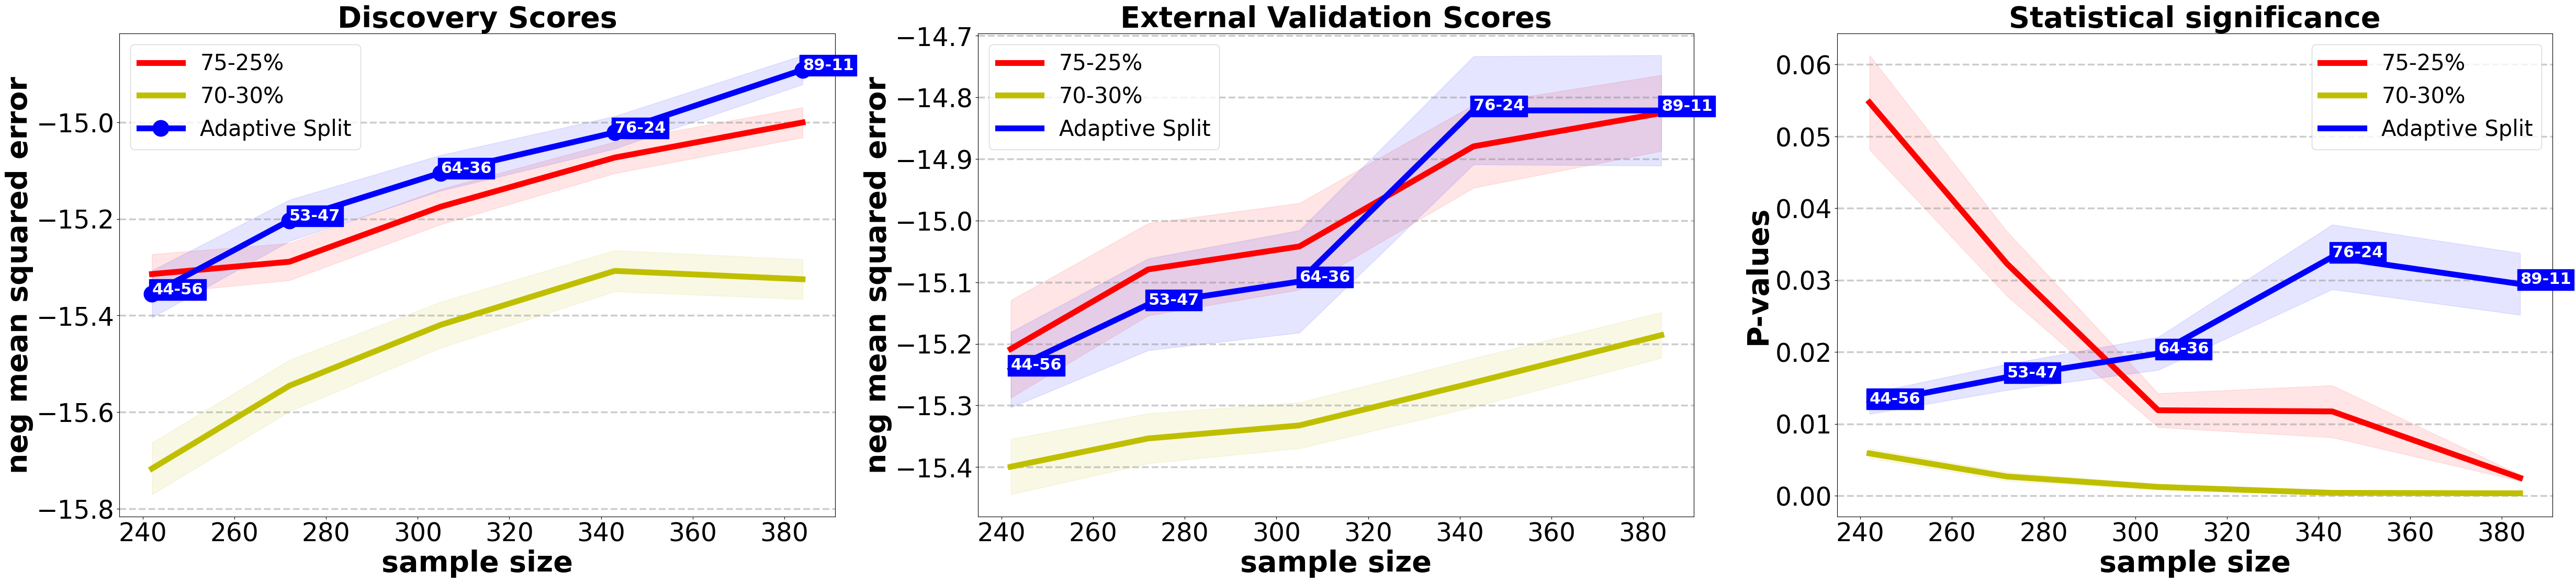

<Figure size 640x480 with 0 Axes>

In [20]:
dataset = '../data_out/HCP'

# Get data;
split7525_train_scores, split7525_train_se, \
split7030_train_scores, split7030_train_se, \
adaptivesplit_train_scores, adaptivesplit_train_se = get_other_splits_training(dataset, 5, 100)

split7525_test_scores, split7525_test_se, \
split7030_test_scores, split7030_test_se, \
adaptivesplit_test_scores, adaptivesplit_test_se = get_other_splits_test(dataset, 5, 100)

split7525_p_values, split7525_pval_se, \
split7030_p_values, split7030_pval_se, \
adaptivesplit_p_values, adaptivesplit_pval_se = get_other_splits_pvals(dataset, 5, 100)

# Plot data;
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    plot_other_splits(dataset, 5, 100, scoring_label="neg mean squared error")

plt.tight_layout()
plt.show()

### Other Splits, IXI

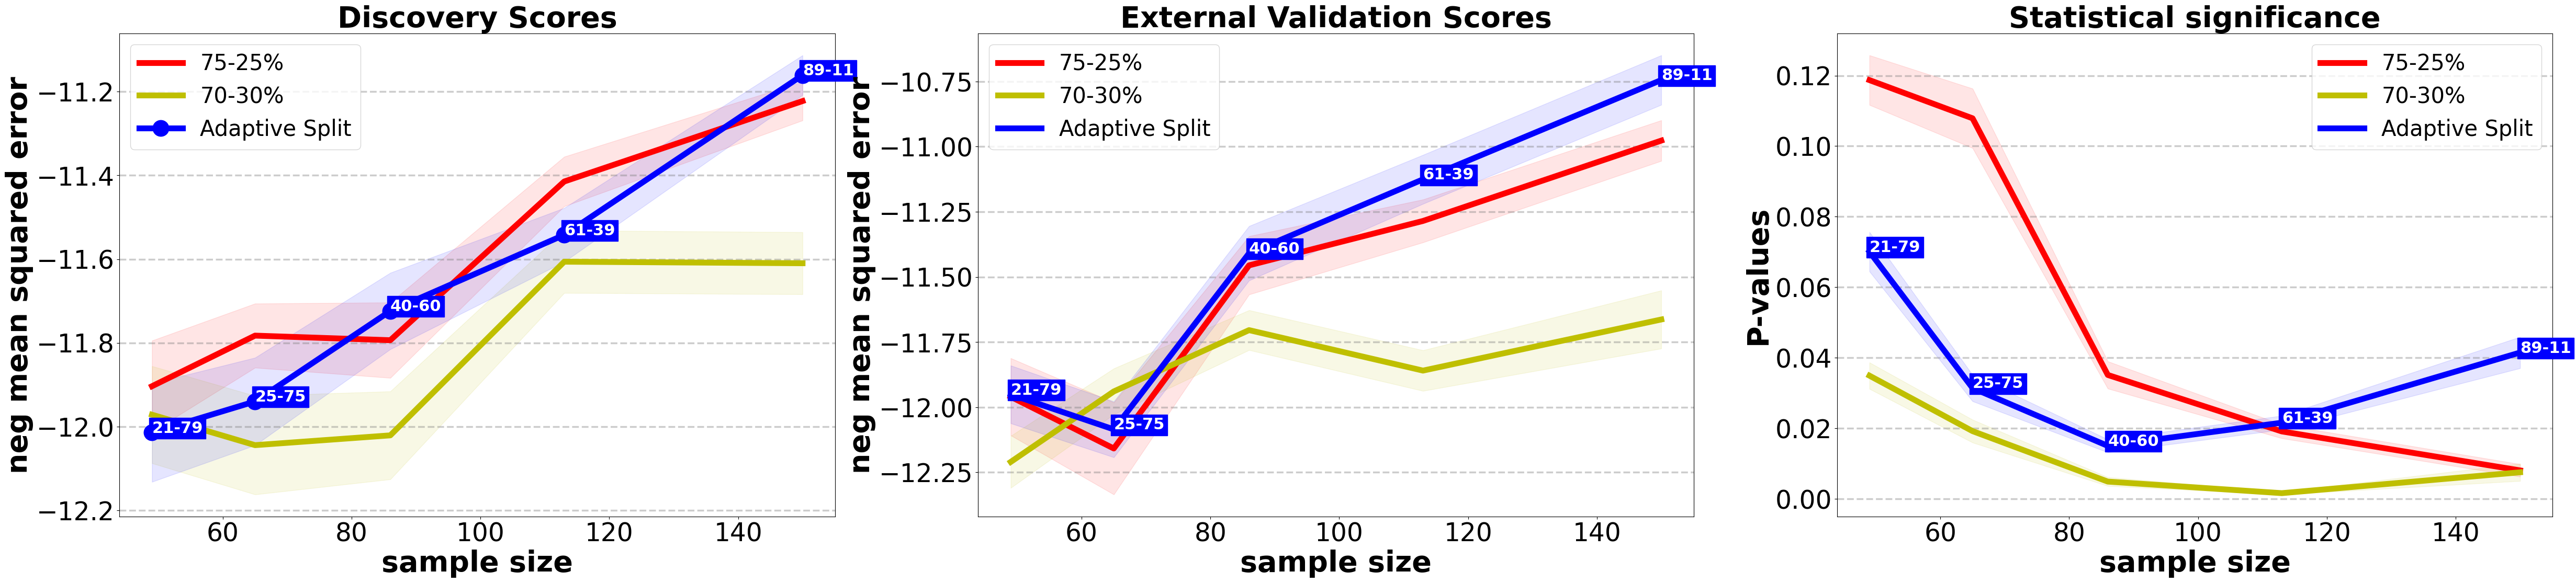

<Figure size 640x480 with 0 Axes>

In [21]:
dataset = '../data_out/IXI'

# Get data;
split7525_train_scores, split7525_train_se, \
split7030_train_scores, split7030_train_se, \
adaptivesplit_train_scores, adaptivesplit_train_se = get_other_splits_training(dataset, 5, 100)

split7525_test_scores, split7525_test_se, \
split7030_test_scores, split7030_test_se, \
adaptivesplit_test_scores, adaptivesplit_test_se = get_other_splits_test(dataset, 5, 100)

split7525_p_values, split7525_pval_se, \
split7030_p_values, split7030_pval_se, \
adaptivesplit_p_values, adaptivesplit_pval_se = get_other_splits_pvals(dataset, 5, 100)

# Plot data;
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    plot_other_splits(dataset, 5, 100, scoring_label="neg mean squared error")

plt.tight_layout()
plt.show()

## Training plot, discovery score vs external validation score

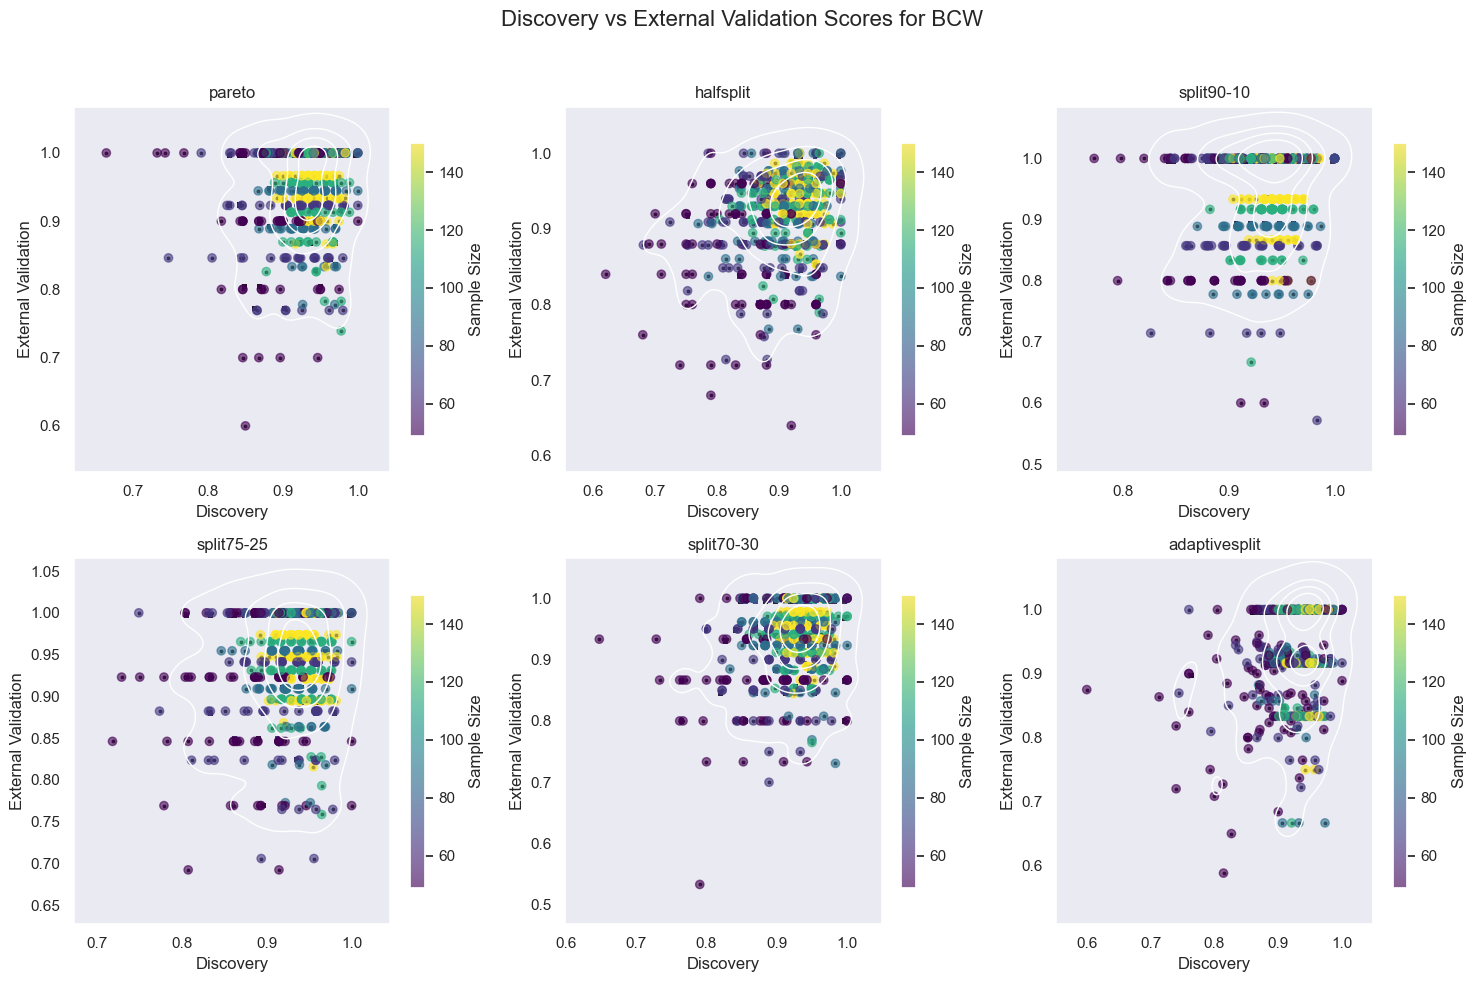

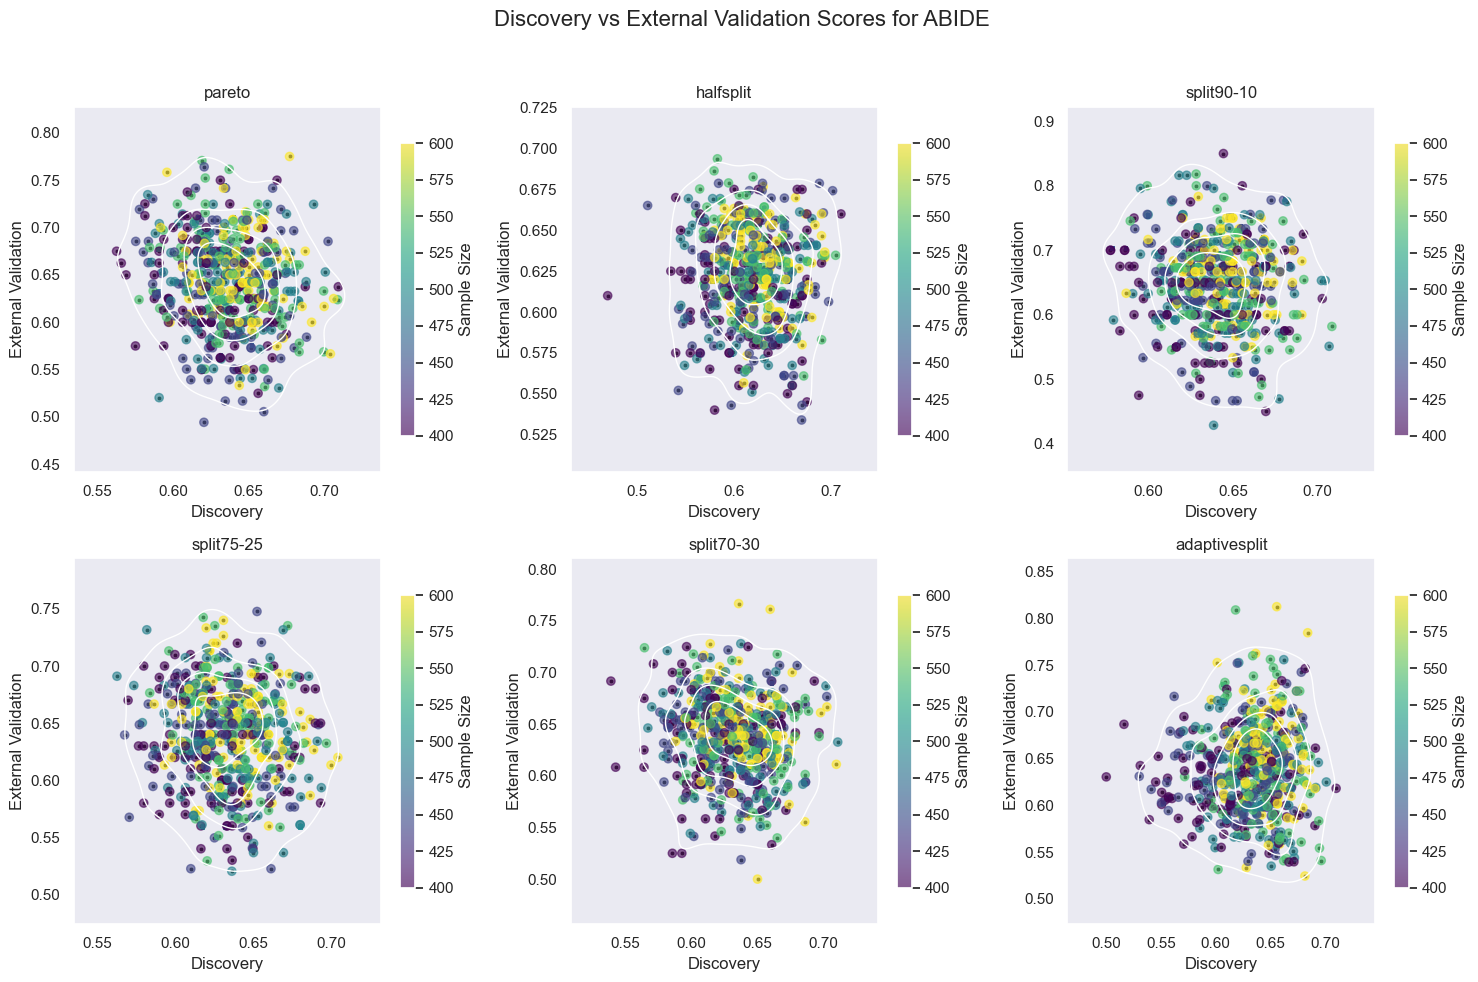

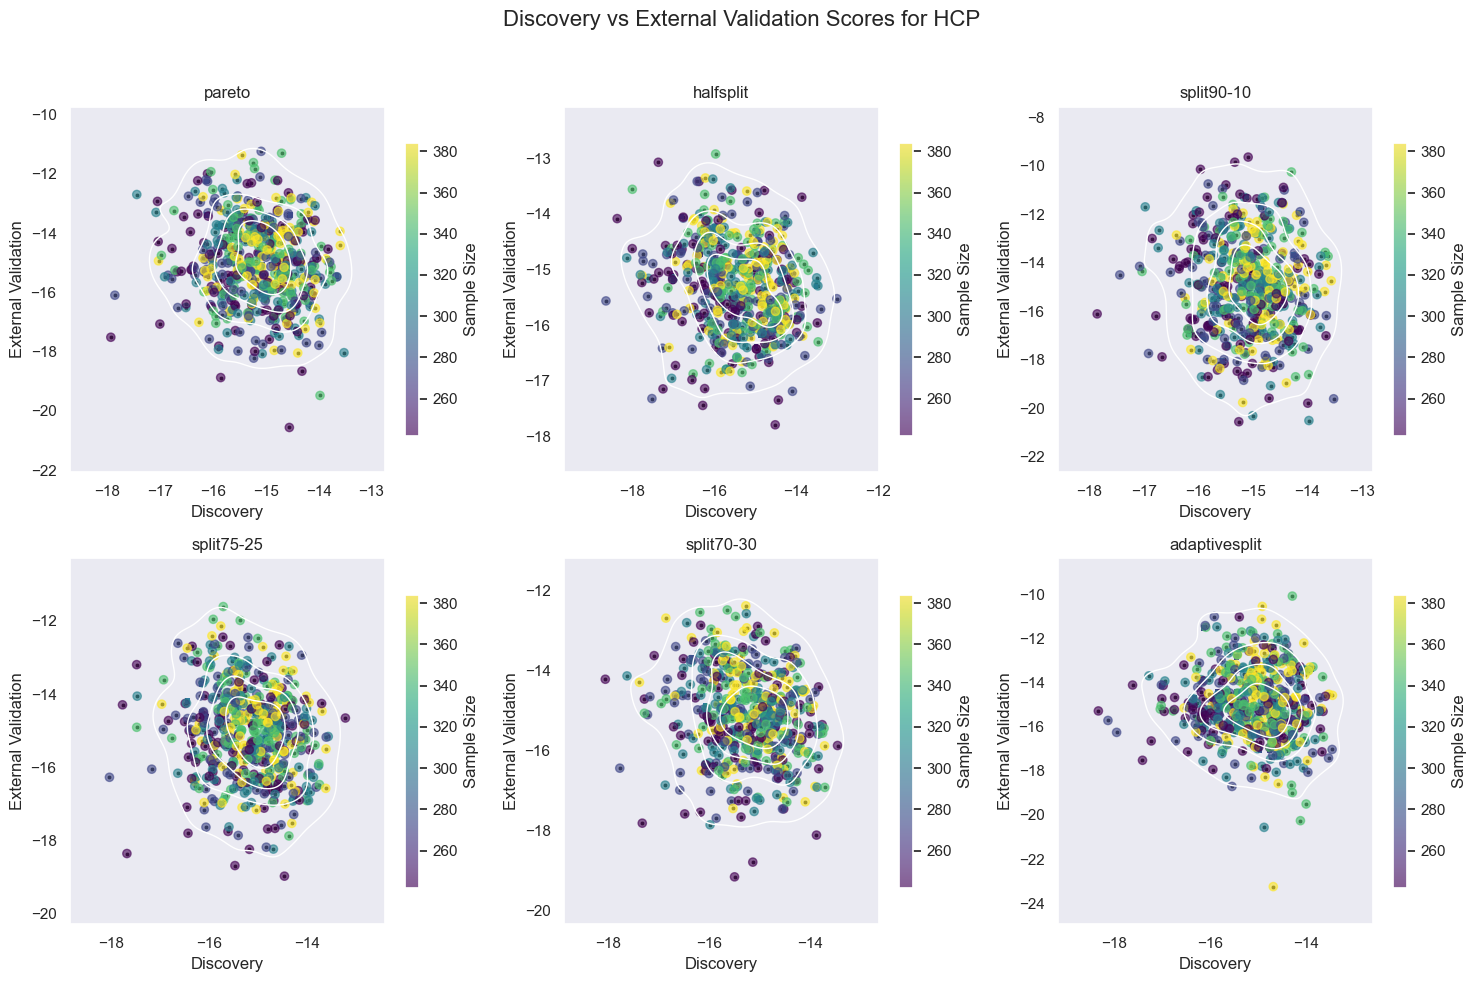

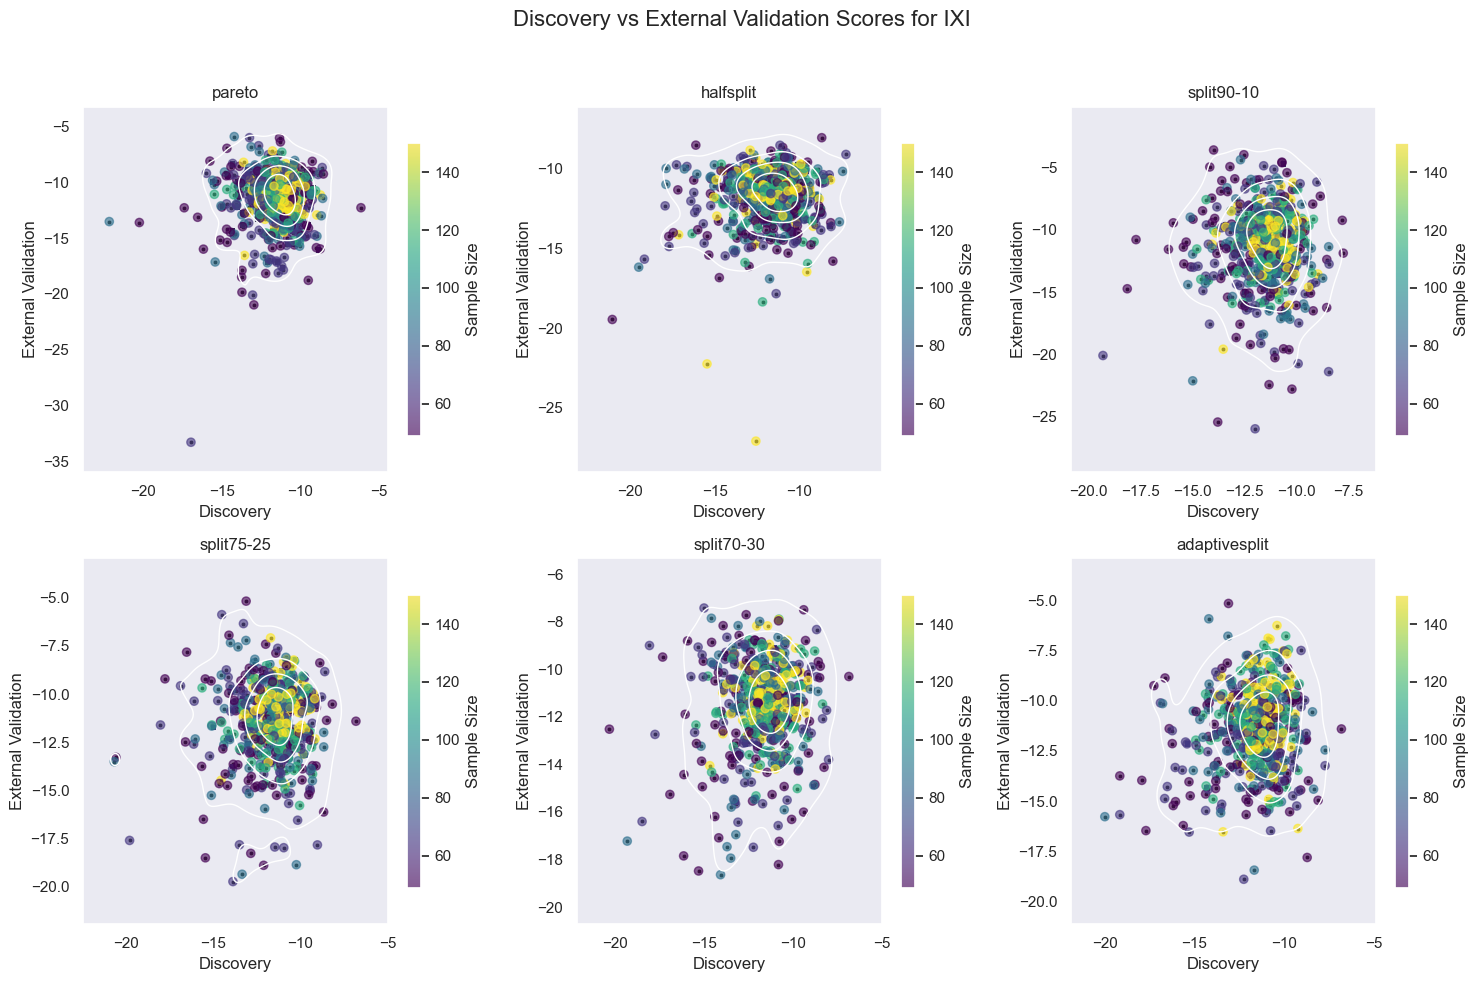

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Set seaborn styling
sns.set_theme(style="dark")

# Dataset directories
IXI = '../data_out/IXI'
HCP = '../data_out/HCP'
ABIDE = '../data_out/ABIDE'
BCW = '../data_out/BCW'

datasets = [BCW, ABIDE, HCP, IXI]

# List of splits to handle
splits = ['pareto', 'halfsplit', 'split90-10', 'split75-25', 'split70-30', 'adaptivesplit']

for dataset in datasets:
    # Construct the path to the result.csv file
    csv_path = os.path.join(dataset, 'results.csv')
    
    # Load the data using pandas
    data = pd.read_csv(csv_path)
    
    # Create subplots: one for each split, arranged in a grid
    num_splits = len(splits)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns for the 6 splits
    fig.suptitle(f'Discovery vs External Validation Scores for {os.path.basename(dataset)}', fontsize=16)
    
    # Flatten the axes array to iterate easily
    axes = axes.flatten()

    for i, split in enumerate(splits):
        # Get training and test scores for the split
        train_col = f'{split}_train_scores'
        test_col = f'{split}_test_scores'
        sample_size_col = 'truncate_sample_size'
        
        # Ensure the split exists in the dataset
        if train_col in data.columns and test_col in data.columns and sample_size_col in data.columns:
            # Extract relevant data
            training_scores = data[train_col]
            test_scores = data[test_col]
            sample_sizes = data[sample_size_col]
            
            # Create scatter plot with seaborn
            ax = axes[i]
            sns.scatterplot(x=training_scores, y=test_scores, s=10, color=".15", ax=ax)
            sns.histplot(x=training_scores, y=test_scores, bins=50, pthresh=.1, cmap="mako", ax=ax)
            sns.kdeplot(x=training_scores, y=test_scores, levels=5, color="w", linewidths=1, ax=ax)
            
            # Set title and labels
            ax.set_title(f'{split}')
            ax.set_xlabel('Discovery')
            ax.set_ylabel('External Validation')

            # Add colorbar for sample sizes in a separate scatter plot (as an overlay)
            scatter = ax.scatter(training_scores, test_scores, c=sample_sizes, cmap='viridis', alpha=0.6)
            fig.colorbar(scatter, ax=ax, shrink=0.8).set_label('Sample Size')

        else:
            # If columns not found, hide the plot and display a message
            axes[i].set_title(f'{split} - Columns Not Found')
            axes[i].axis('off')

    # Adjust layout and spacing
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
    plt.show()
